## Загрузка и подготовка данных

In [1]:
# импорт библиотек для исследования
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [2]:
# откроем файлы
df_one = pd.read_csv('geo_data_0.csv')
df_two = pd.read_csv('geo_data_1.csv')
df_thr = pd.read_csv('geo_data_2.csv')
# выведем на экран
display(df_one.info())
display(df_one.head(3))
# выведем на экран
display(df_two.info())
display(df_two.head(3))
# выведем на экран
display(df_thr.info())
display(df_thr.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910


### Вывод

Данные корректны, пропусков нет.

## Обучение и проверка модели

In [3]:
# обозначим признаки и цели, выведем среднее количество 
features_one = df_one.drop(['id', 'product'], axis=1)
target_one = df_one['product']
display(df_one['product'].mean())
# обозначим признаки и цели, выведем среднее количество 
features_two = df_two.drop(['id', 'product'], axis=1)
target_two = df_two['product']
display(df_two['product'].mean())
# обозначим признаки и цели, выведем среднее количество 
features_thr = df_thr.drop(['id', 'product'], axis=1)
target_thr = df_thr['product']
display(df_thr['product'].mean())
# разделим выборки на обучающие и валидационные
features_train_one, features_valid_one, target_train_one, target_valid_one = train_test_split(features_one, target_one, test_size=0.25, random_state=42)
features_train_one, target_train_one = shuffle(features_train_one, target_train_one, random_state=42)
# разделим выборки на обучающие и валидационные                                      
features_train_two, features_valid_two, target_train_two, target_valid_two = train_test_split(features_two, target_two, test_size=0.25, random_state=42)
features_train_two, target_train_two = shuffle(features_train_two, target_train_two, random_state=42)
# разделим выборки на обучающие и валидационные
features_train_thr, features_valid_thr, target_train_thr, target_valid_thr = train_test_split(features_thr, target_thr, test_size=0.25, random_state=42)
features_train_thr, target_train_thr = shuffle(features_train_thr, target_train_thr, random_state=42)


92.50000000000001

68.82500000000002

95.00000000000004

In [4]:
# обучим первую модель, выведем средние значения и сумму предсказаний
model_one = LinearRegression() 
model_one.fit(features_train_one, target_train_one)
predictions_valid_one = pd.Series(model_one.predict(features_valid_one), index=features_valid_one.index)
display(predictions_valid_one.mean())
display(predictions_valid_one.sum())
# выведем результат
result_one = mean_squared_error(target_valid_one, predictions_valid_one) ** 0.5
display("RMSE первой модели линейной регрессии на валидационной выборке:", result_one)

92.39879990657768

2309969.997664442

'RMSE первой модели линейной регрессии на валидационной выборке:'

37.75660035026169

In [5]:
# обучим вторую модель, выведем средние значения и сумму предсказаний
model_two = LinearRegression() 
model_two.fit(features_train_two, target_train_two)
predictions_valid_two = pd.Series(model_two.predict(features_valid_two), index=features_valid_two.index)
display(predictions_valid_two.mean())
display(predictions_valid_two.sum())
# выведем результат
result_two = mean_squared_error(target_valid_two, predictions_valid_two) ** 0.5
display("RMSE второй модели линейной регрессии на валидационной выборке:", result_two)

68.71287803913762

1717821.9509784405

'RMSE второй модели линейной регрессии на валидационной выборке:'

0.8902801001028822

In [6]:
# обучим третью модель, выведем средние значения и сумму предсказаний
model_thr = LinearRegression() 
model_thr.fit(features_train_thr, target_train_thr)
predictions_valid_thr = pd.Series(model_thr.predict(features_valid_thr), index=features_valid_thr.index)
display(predictions_valid_thr.mean())
display(predictions_valid_thr.sum())
# выведем результат
result_thr = mean_squared_error(target_valid_thr, predictions_valid_thr) ** 0.5
display("RMSE третьей модели линейной регрессии на валидационной выборке:", result_thr)

94.77102387765936

2369275.596941484

'RMSE третьей модели линейной регрессии на валидационной выборке:'

40.14587231134218

### Вывод

- Для первой модели RMSE равна 37.75
- Для второй модели RMSE равна 0.89
- Для третьей модели RMSE равна 40.14

## Подготовка к расчёту прибыли

In [7]:
# обозначим основные константы
BUDGET_REGION = 10_000_000_000
INCOME_PER_UNIT = 450_000
COUNT_WELL = 500
BEST_COUNT_WELL = 200
# расчет безубыточности
min_product_region = BUDGET_REGION / (INCOME_PER_UNIT * BEST_COUNT_WELL)
display('Минимальный объем тыс. баррелей для разработки одной скважины составляет:', round(min_product_region, 0))

'Минимальный объем тыс. баррелей для разработки одной скважины составляет:'

111.0

In [8]:
# объем баррелей в лучших 200 скважинах
#top_region_one = predictions_valid_one.sort_values(ascending=False)
#display('Для первого региона объем составляет:', round(sum(top_region_one[0:200]), 0))
#top_region_two = predictions_valid_two.sort_values(ascending=False)
#display('Для второго региона объем составляет:', round(sum(top_region_two[0:200]), 0))
#top_region_thr = predictions_valid_thr.sort_values(ascending=False)
#display('Для третьего региона объем составляет:', round(sum(top_region_thr[0:200]), 0))

In [9]:
# функция расчет прибыли
def revenue(predictions, target):
    predictions_sort = predictions.sort_values(ascending=False)
    predictions_selected = predictions_sort[0:200]
    product_selected = target[predictions_selected.index]
    value = (sum(product_selected) * INCOME_PER_UNIT) - BUDGET_REGION
    return value

In [10]:
# расчет прибыли по регионам без bootstrap
display('Размер прибыли с первого региона:', round(revenue(predictions_valid_one, target_valid_one), 0))
display('Размер прибыли со второго региона:', round(revenue(predictions_valid_two, target_valid_two), 0))
display('Размер прибыли с третьего региона:', round(revenue(predictions_valid_thr, target_valid_thr), 0))

'Размер прибыли с первого региона:'

3359141114.0

'Размер прибыли со второго региона:'

2415086697.0

'Размер прибыли с третьего региона:'

2598571759.0

### Вывод

Минимальный объем тыс. баррелей для разработки одной скважины составляет: 111.00, что больше на 14-38% в зависимости от региона:
- Средний объем скважин для первого региона составляет 92.39 тыс. баррелей
- Средний объем скважин для вторго региона составляет 68.71 тыс. баррелей
- Средний объем скважин для третьего региона составляет 94.77 тыс. баррелей

## Расчёт прибыли и рисков 

In [11]:
# создадим функию расчета прибыли
def bootstrap(predictions, target):
    state = np.random.RandomState(42)
    values = []
    for i in range(1000):
        subsample = predictions.sample(n=500, replace=True, random_state=state)
        values.append(revenue(subsample, target))
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    display('Средняя прибыль, млрд. рублей', round(values.mean()/1000000000, 2))
    display('95% доверительный интервал, млрд. рублей', [round(lower/1000000000, 2), round(upper/1000000000, 2)])    
    # построение графика
    (values/1000000000).hist(bins=20, figsize=(8, 5))
    plt.xlabel('Прибыль, млрд. рублей')
    plt.title('График распределения прибыли')
    plt.show()
    # расчет рисков
    display('Возможные убытки, %', 100 * values[values < 0].count() / len(values))

'Средняя прибыль, млрд. рублей'

0.4

'95% доверительный интервал, млрд. рублей'

[-0.11, 0.9]

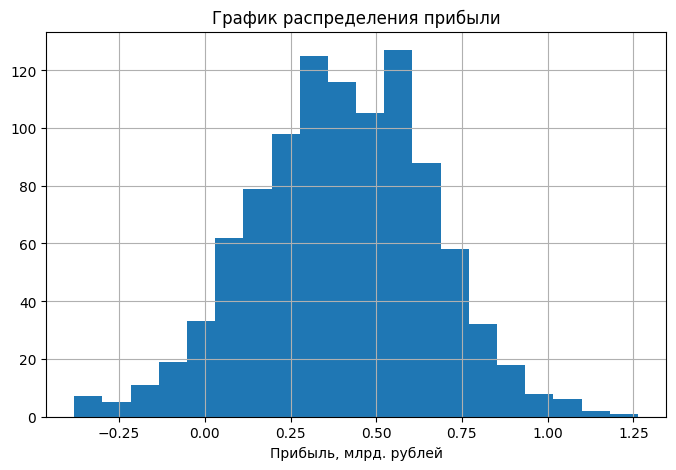

'Возможные убытки, %'

6.0

In [12]:
# расчет прибыли для первого региона
bootstrap(predictions_valid_one, target_valid_one)

'Средняя прибыль, млрд. рублей'

0.45

'95% доверительный интервал, млрд. рублей'

[0.06, 0.85]

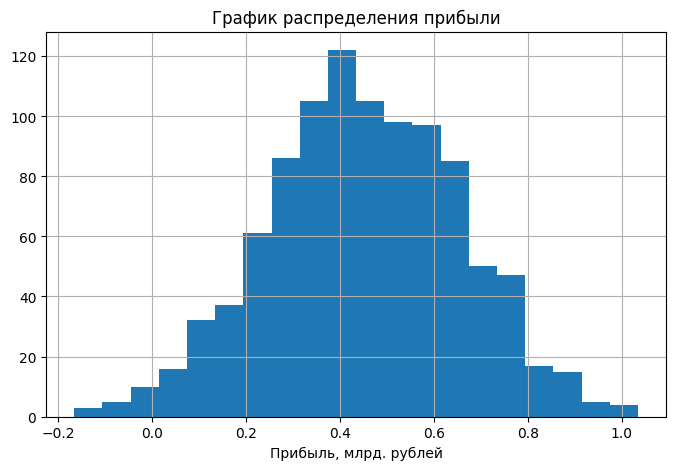

'Возможные убытки, %'

1.5

In [13]:
# расчте прибыли для второго региона
bootstrap(predictions_valid_two, target_valid_two)

'Средняя прибыль, млрд. рублей'

0.38

'95% доверительный интервал, млрд. рублей'

[-0.14, 0.89]

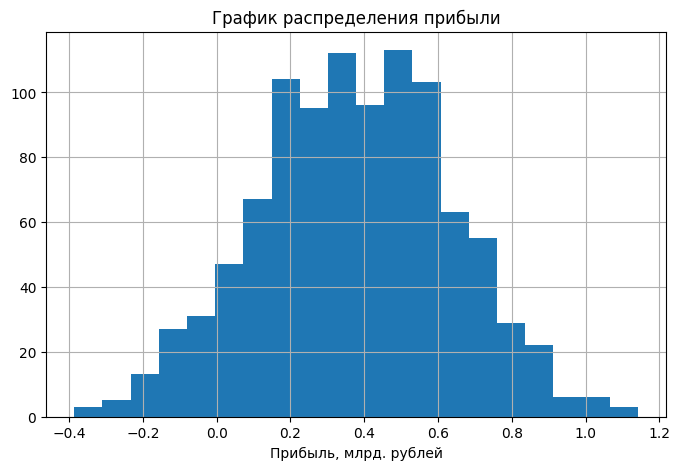

'Возможные убытки, %'

8.0

In [14]:
# расчте прибыли для третьего региона
bootstrap(predictions_valid_thr, target_valid_thr)

### Вывод

Наиболее удачным для разработки является второй регион, так как:
- Из трех исследуемых, показал наивысший показатель прибыли: 0.45 млрд. рублей
- Имеет наименьший риск в размере 1.5%
- Имеет лучший из трех, доверительный интервал